In [2]:
# bu sayfada economic_calendar veri setinin üzerinde  analiz yapılmıştır.
import pandas as pd
econocal =pd.read_csv ("economic_calendar.csv")
df = econocal.copy()

In [3]:
# gözlem ve betimsel istatisktik işlemleri
len(df)

27260

In [4]:
df.head()

,pk,date,time,country,indicator,priority,explained,expectation,previous
0,1,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Ton),1,NaN,NaN,"1,770MLN"
1,2,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Haftalık),1,NaN,NaN,"%0,5"
2,3,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Yıllık),1,NaN,NaN,"%42,7"
3,4,2021-04-26,23:00,ABD,AISI Çelik Üretimi Kapasite Kullanımı,1,NaN,NaN,"%78,0"
4,5,2021-04-26,23:00,ABD,Perakende Benzin Fiyatları($/Galon),1,NaN,NaN,2.855


In [5]:
df.dtypes

pk              int64
date           object
time           object
country        object
indicator      object
priority        int64
explained      object
expectation    object
previous       object
dtype: object

In [6]:
# economic_variables veri setine uygun olacak şekilde tarihler filtrelendi
df=df[(df['date'] >= '2021-04-28') & (df['date'] < '2021-10-18')]

In [7]:
#sonradan pivot table üzerinde kullanmak üzere "year" ve "month" olacak şekilde tarhileri ayırdık
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [8]:
# explained değişkeninde değerleri açıklanmamış bir çok veri var, bunları filtreleyip, dışarıda bırakmamız daha doğru olur.
#Çünkü olumlu ya da olumsuz olarak nasıl bir etkisinin olacağını göremiyoruz.
df =df[df.explained.notnull()]

In [9]:
# veri setindeki priority değeri 2 ve üstü olanların gruplar halinde sayılarını gözlemldedik:
print(df['priority'].value_counts().loc[lambda x : x>=2])

3    1243
1    1072
2     199
Name: priority, dtype: int64


In [10]:
# şimdi priority kısmı 2 ve üstü olanları filtreleyip atamasını yapıyoruz
df =df [(df.priority>=2 )]

In [11]:
# 1243+199=1442 gözlem olacak şekilde veri setimizi filtrelemiz olduk
len(df)

1442

In [12]:
#veri setini yeniden gözlemledik
df.head (5)

,pk,date,time,country,indicator,priority,explained,expectation,previous,year,month
146,439,2021-04-28,02:00,Güney Kore,GSYH(Öncü),3,"%1,6","%1,0","%1,2",2021,4
147,440,2021-04-28,02:00,Güney Kore,GSYH(Öncü-Yıllık),3,"%1,8","%1,1","-%1,2",2021,4
150,443,2021-04-28,05:00,Doğu Timor,Tüketici Fiyat Endeksi(Aylık),3,"%0,7",NaN,"%0,4",2021,4
151,444,2021-04-28,05:00,Doğu Timor,Tüketici Fiyat Endeksi(Yıllık),3,"%2,9",NaN,"%2,5",2021,4
152,445,2021-04-28,06:00,Japonya,BoJ Gösterge Faiz Oranı,3,"-%0,10","-%0,10","-%0,10",2021,4


In [13]:
# şimdi her ülke için toplamda kaç adet explained veri girilmiş; groupby-sum ile bunları saydırıp topladık
df2 =df.explained.notnull().groupby(df['country']).sum().astype(int).reset_index(name='count')

In [14]:
df2.head (5)

,country,count
0,ABD,6
1,ASEAN,3
2,Afganistan,8
3,Almanya,9
4,Angola,4


In [15]:
# bunları en yüksekten en düşüğe sıraladık, ilk  26 taneyi aldık çünkü ilk'26'dan sonra girilen veri toplamda 10'un altına iniyor.
sorted =df2.sort_values(by=['count'], ascending=False).head(26)

In [16]:
sorted.head (5)

,country,count
38,Japonya,194
6,Avustralya,163
31,Güney Kore,108
90,Çin,107
25,Filipinler,75


In [17]:
sorted.tail (5)

,country,count
99,İsviçre,12
19,Doğu Timor,11
62,Pakistan,11
33,Hindistan,10
65,Peru,10


In [18]:
#bu ilk 26 ülkenin isimlerini bir liste içine aldık 
toplist = sorted['country'].tolist()

In [19]:
print(*toplist, sep = ", ") 

Japonya, Avustralya, Güney Kore, Çin, Filipinler, Hollanda, Malezya, Finlandiya, Singapur, Endonezya, Tayland, Estonya, Vietnam, İsveç, Brunei, Türkiye, İrlanda, Katar, Tayvan, İtalya, Macau, İsviçre, Doğu Timor, Pakistan, Hindistan, Peru


In [20]:
#pivot table için listemizi tuple haline getirdik
def convert(list):
    return tuple(list)
toplist =convert (toplist)

In [21]:
dftop=df[df.country.isin(toplist)]
len(dftop)

1131

In [22]:
dftop.head (5)

,pk,date,time,country,indicator,priority,explained,expectation,previous,year,month
146,439,2021-04-28,02:00,Güney Kore,GSYH(Öncü),3,"%1,6","%1,0","%1,2",2021,4
147,440,2021-04-28,02:00,Güney Kore,GSYH(Öncü-Yıllık),3,"%1,8","%1,1","-%1,2",2021,4
150,443,2021-04-28,05:00,Doğu Timor,Tüketici Fiyat Endeksi(Aylık),3,"%0,7",NaN,"%0,4",2021,4
151,444,2021-04-28,05:00,Doğu Timor,Tüketici Fiyat Endeksi(Yıllık),3,"%2,9",NaN,"%2,5",2021,4
152,445,2021-04-28,06:00,Japonya,BoJ Gösterge Faiz Oranı,3,"-%0,10","-%0,10","-%0,10",2021,4


In [23]:
# heat map oluşturmak üzere ülkeler bazında açıklanan explained verilerini pivot table halinde özetledik
import numpy as np
pivotdf =pd.pivot_table(dftop, values='pk', index=["country"], columns=["month"], aggfunc=np.size)

In [24]:
pivotdf

month,4,5,6,7,8,9,10
country,,,,,,,
Avustralya,6.0,14.0,37.0,28.0,33.0,27.0,18.0
Brunei,NaN,3.0,2.0,4.0,2.0,NaN,6.0
Doğu Timor,2.0,2.0,2.0,NaN,NaN,5.0,NaN
Endonezya,NaN,1.0,1.0,6.0,8.0,10.0,6.0
Estonya,NaN,2.0,7.0,5.0,3.0,6.0,5.0
Filipinler,NaN,NaN,18.0,12.0,17.0,16.0,12.0
Finlandiya,1.0,9.0,8.0,3.0,9.0,4.0,9.0
Güney Kore,5.0,14.0,23.0,14.0,18.0,26.0,8.0
Hindistan,NaN,NaN,4.0,3.0,1.0,1.0,1.0


In [25]:
#daha sonra kullanmak üzere pivot-table'ı data frame haline getirdik
framedf = pd.DataFrame(pivotdf.to_records())

In [26]:
framedf

,country,4,5,6,7,8,9,10
0,Avustralya,6.0,14.0,37.0,28.0,33.0,27.0,18.0
1,Brunei,NaN,3.0,2.0,4.0,2.0,NaN,6.0
2,Doğu Timor,2.0,2.0,2.0,NaN,NaN,5.0,NaN
3,Endonezya,NaN,1.0,1.0,6.0,8.0,10.0,6.0
4,Estonya,NaN,2.0,7.0,5.0,3.0,6.0,5.0
5,Filipinler,NaN,NaN,18.0,12.0,17.0,16.0,12.0
6,Finlandiya,1.0,9.0,8.0,3.0,9.0,4.0,9.0
7,Güney Kore,5.0,14.0,23.0,14.0,18.0,26.0,8.0
8,Hindistan,NaN,NaN,4.0,3.0,1.0,1.0,1.0
9,Hollanda,NaN,4.0,14.0,7.0,8.0,15.0,10.0


<AxesSubplot:xlabel='month', ylabel='country'>

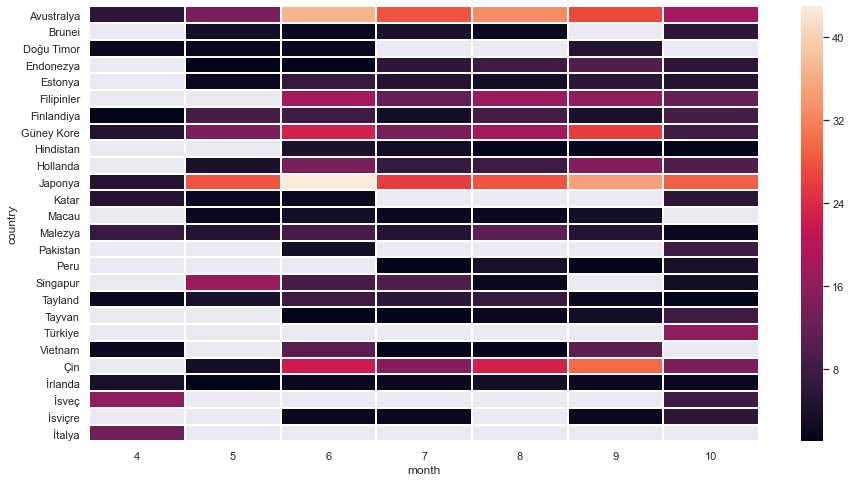

In [30]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap (pivotdf,linewidths =1)

In [ ]:
#sonuç olarak japonya ve avustralya özelinde heat map'e baktığımız zaman
# 6. ayda yaşanan açıklanan "explained" veri sayısının en üst düzeye çıkması 
# ve 9. ayda görülen ısı renklerine göre; 9. aydaki verilerin 6. aya düşük kalması durumu
# 1 ay gecikmeli olarak transactions veri setindeki heat map üzerindeki google ads verilerine yansımıştır.
# yani google ads üzerinden gelen lead sayısı 1 ay gecikmeli olarak;
#7. ayda peak yapmıştır. 10. ayda ise 7. aya göre belirgin azalma görülmüştür.
# aşağıdaki gibi iki ülke için girilen filitreleme ile daha açıkça görülebilir.
# ayrıca task3 dosyasında görülen mevsimselliğe dayalı tahmin yapmış olan fbprophet makine öğrenmesi algoritması;
# yine buradaki heat-map 'de görülen Avustralya-Japonya özelindeki  sonuçlarla örtüşmüştür.


In [37]:
framedf [(framedf.country == "Avustralya") | (framedf.country == 'Japonya')]

,country,4,5,6,7,8,9,10
0,Avustralya,6.0,14.0,37.0,28.0,33.0,27.0,18.0
10,Japonya,5.0,28.0,43.0,26.0,28.0,35.0,29.0
